**Steps and Implementation**
1. Data Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Building
5. Model Evaluation
6. Visualization

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [65]:
dataset = pd.read_csv(r"C:\Users\shubham\Downloads\customer_support_tickets.csv")
dataset.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [66]:
# Display the basic information about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [67]:
# Count the Null Values In the dateset
dataset.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [68]:
# Count the Duplicate values
dataset.duplicated().sum()

0

In [69]:
dataset.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [70]:
dataset.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [71]:
common_issue = dataset["Ticket Subject"].value_counts().head(10)

In [72]:
print("Top 10 comman issue are:")
print(common_issue)

Top 10 comman issue are:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


In [73]:
dataset["Date of Purchase"] = pd.to_datetime(dataset["Date of Purchase"])

In [74]:
dataset["YearMonth"] = dataset["Date of Purchase"].dt.to_period("M")

In [75]:
ticket_trends = dataset.groupby(dataset["YearMonth"]).size()

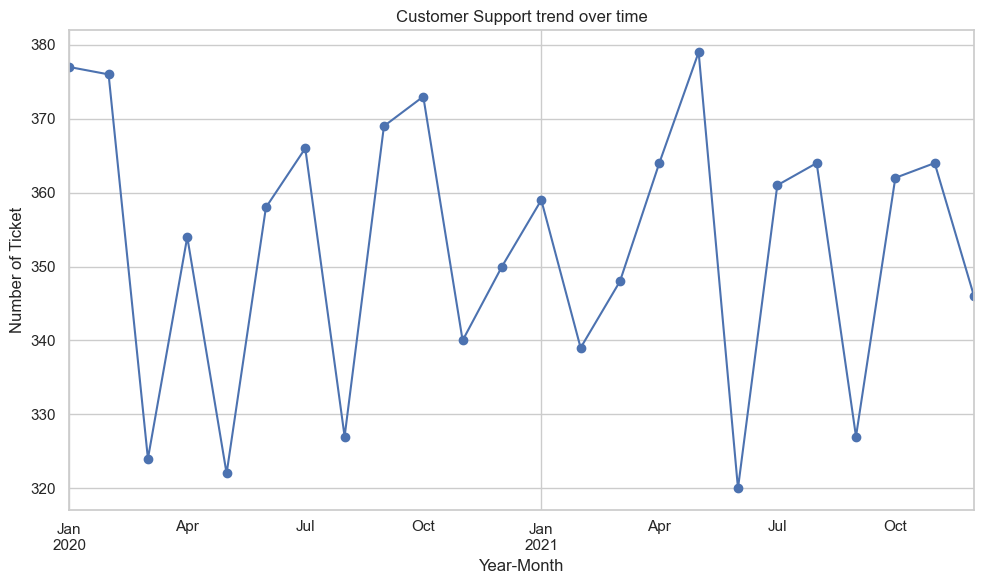

In [76]:
plt.figure(figsize=(10,6))
ticket_trends.plot(kind="line", marker='o')
plt.title("Customer Support trend over time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Ticket")
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
#ticket type segment
ticket_type_segment = dataset.groupby("Ticket Type").size()

In [78]:
ticket_type_segment

Ticket Type
Billing inquiry         1634
Cancellation request    1695
Product inquiry         1641
Refund request          1752
Technical issue         1747
dtype: int64

In [79]:
satisfication_segment = dataset.groupby("Customer Satisfaction Rating").size()

In [80]:
satisfication_segment

Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
dtype: int64

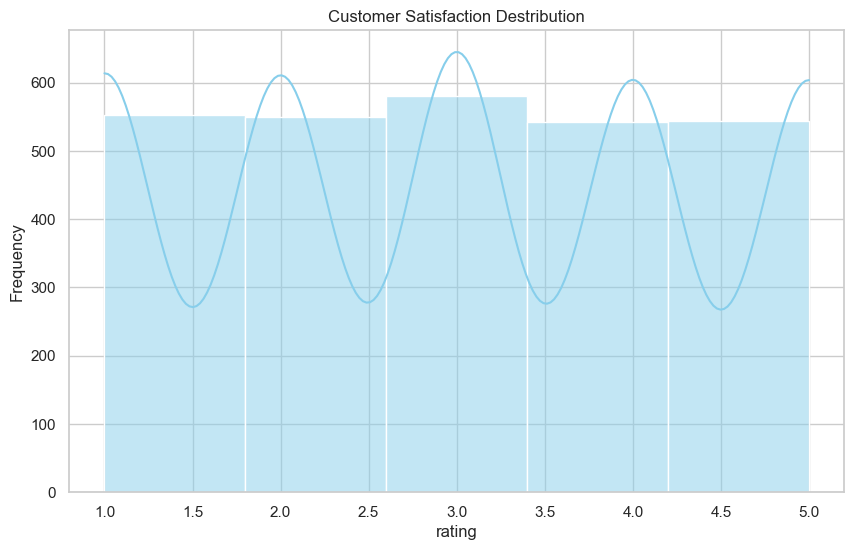

In [81]:
# setting the Plotting Asethetics
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(dataset["Customer Satisfaction Rating"],bins=5,kde=True, color="skyblue")
plt.xlabel("rating")
plt.ylabel("Frequency")
plt.title("Customer Satisfaction Destribution")
plt.show()

In [82]:
# Ticket Status Destribution
ticket_status_destribution = dataset["Ticket Status"].value_counts()

In [83]:
ticket_status_destribution

Ticket Status
Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: count, dtype: int64

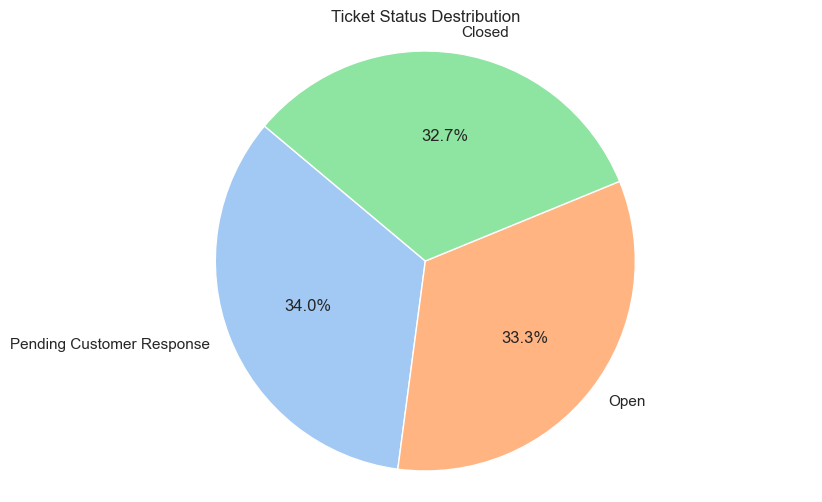

In [86]:
plt.figure(figsize=(10,6))
plt.pie(ticket_status_destribution, labels=ticket_status_destribution.index, autopct="%1.1f%%", 
        colors=sns.color_palette('pastel'),startangle=140)
plt.title("Ticket Status Destribution")
plt.axis('equal')
plt.show()

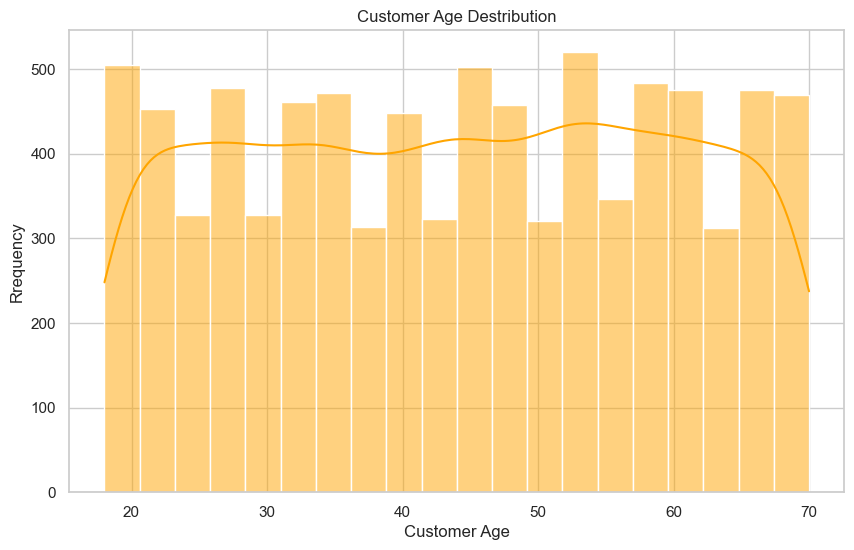

In [104]:
# customer Age Destribution
plt.figure(figsize=(10,6))
sns.histplot(dataset["Customer Age"],bins=20,kde=True,color='orange')
plt.title("Customer Age Destribution")
plt.xlabel("Customer Age")
plt.ylabel("Rrequency")
plt.show()

In [92]:
customer_gender_destribution = dataset["Customer Gender"].value_counts()

In [93]:
customer_gender_destribution

Customer Gender
Male      2896
Female    2887
Other     2686
Name: count, dtype: int64

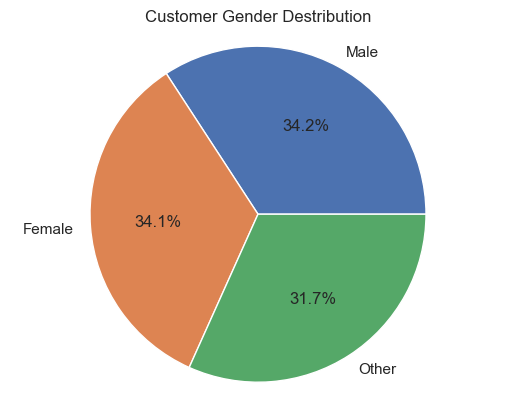

In [100]:
plt.pie(customer_gender_destribution,labels=customer_gender_destribution.index,
        autopct="%1.1f%%")
plt.title("Customer Gender Destribution")
plt.axis('equal')
plt.show()

In [105]:
#ticket Chanel Destribution

ticket_chanel_destribution = dataset["Ticket Channel"].value_counts()

In [106]:
ticket_chanel_destribution

Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64

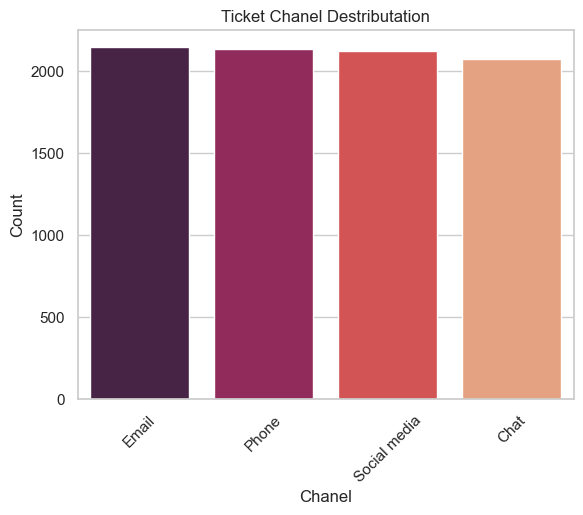

In [109]:
plt.figure(figure=(10,6))
sns.barplot(x=ticket_chanel_destribution.index,y=ticket_chanel_destribution.values,palette='rocket')
plt.xticks(rotation=45)
plt.xlabel("Chanel")
plt.ylabel("Count")
plt.title("Ticket Chanel Destributation")
plt.show()

In [110]:
average_satisfaction = dataset.groupby("Customer Gender")["Customer Satisfaction Rating"].mean().reset_index()

In [111]:
average_satisfaction

,Customer Gender,Customer Satisfaction Rating
0,Female,2.971545
1,Male,3.028384
2,Other,2.974684


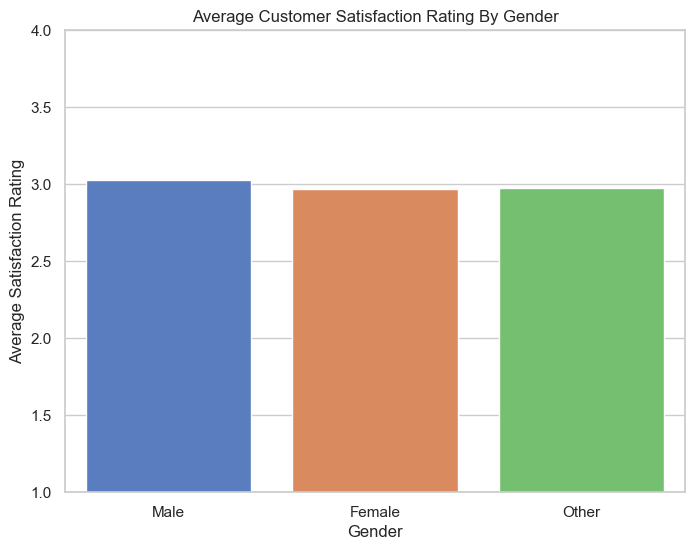

In [116]:
plt.figure(figsize=(8,6))
sns.barplot(x=average_satisfaction["Customer Gender"], y=average_satisfaction["Customer Satisfaction Rating"],
            data=average_satisfaction, palette="muted",order=['Male', 'Female', 'Other'])
plt.title("Average Customer Satisfaction Rating By Gender")
plt.xlabel("Gender")
plt.ylim(1,4) #adjust y-axis Limit
plt.ylabel("Average Satisfaction Rating")
plt.show()

In [119]:
product_purchase_destribution = dataset["Product Purchased"].value_counts().head(10)

In [120]:
product_purchase_destribution

Product Purchased
Canon EOS              240
GoPro Hero             228
Nest Thermostat        225
Philips Hue Lights     221
Amazon Echo            221
LG Smart TV            219
Sony Xperia            217
Roomba Robot Vacuum    216
Apple AirPods          213
LG OLED                213
Name: count, dtype: int64

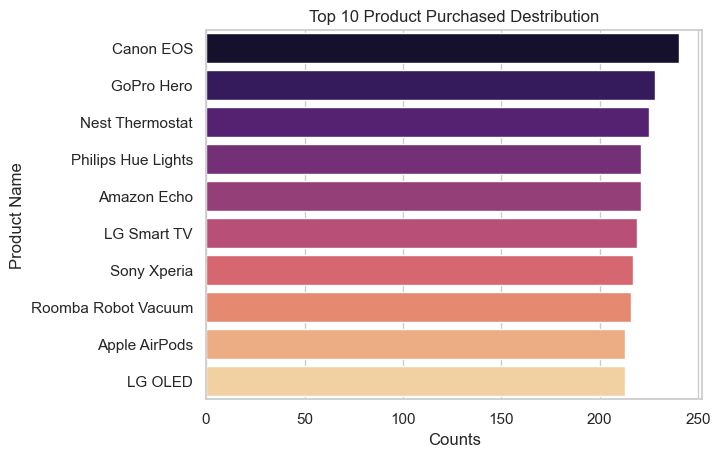

In [128]:
sns.barplot(x=product_purchase_destribution.values, y= product_purchase_destribution.index, palette='magma')
plt.title("Top 10 Product Purchased Destribution")
plt.ylabel("Product Name")
plt.xlabel("Counts")
plt.show()

In [148]:
top_item_male = dataset[dataset["Customer Gender"] == "Male"]["Product Purchased"].value_counts().head(5)
top_item_female = dataset[dataset["Customer Gender"] == "Female"]["Product Purchased"].value_counts().head(5)
top_item_Other = dataset[dataset["Customer Gender"] == "Other"]["Product Purchased"].value_counts().head(5)

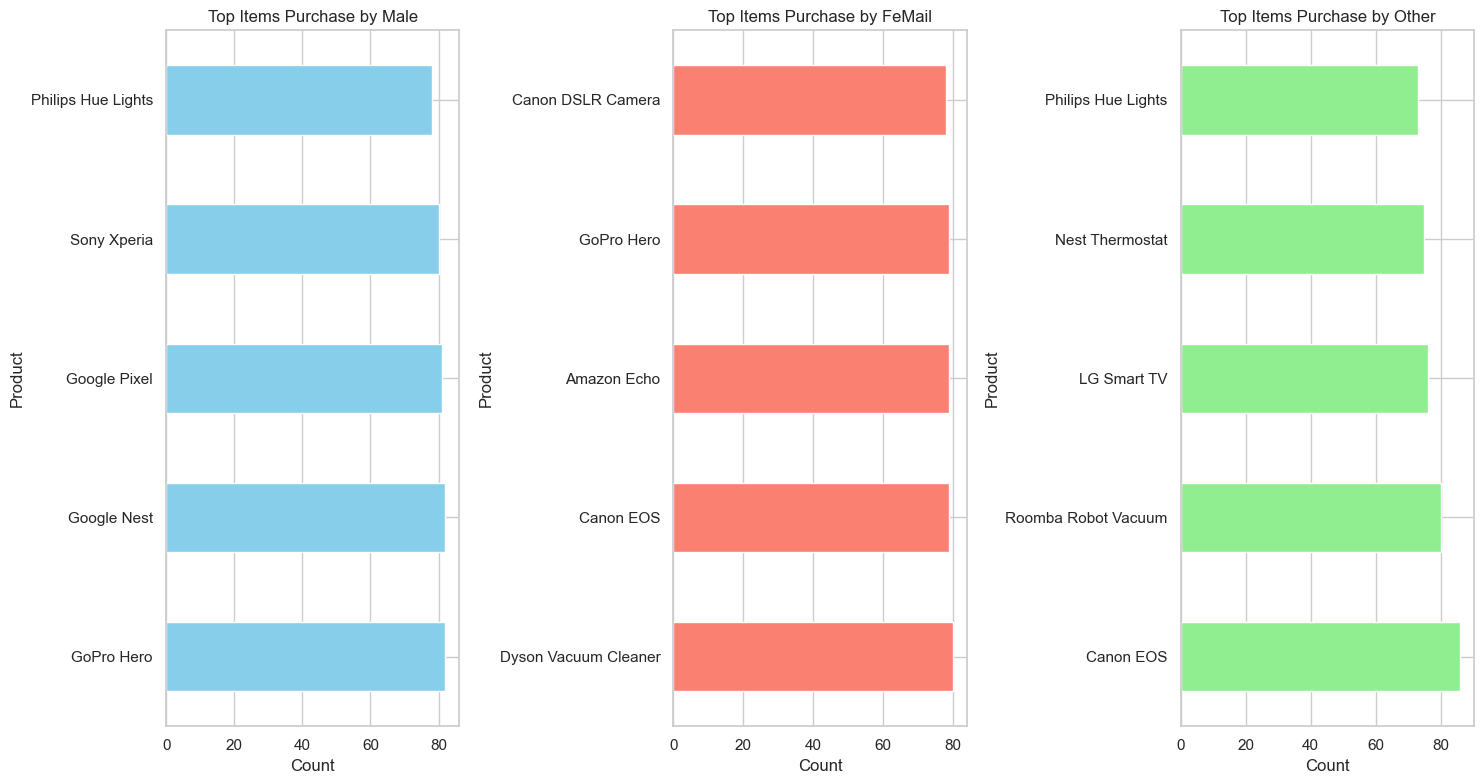

In [155]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
top_item_male.plot(kind='barh', color='skyblue')
plt.title("Top Items Purchase by Male")
plt.ylabel("Product")
plt.xlabel("Count")
plt.subplot(1,3,2)
top_item_female.plot(kind='barh', color='salmon')
plt.title("Top Items Purchase by FeMail")
plt.ylabel("Product")
plt.xlabel("Count")
plt.subplot(1,3,3)
top_item_Other.plot(kind='barh', color='lightgreen')
plt.title("Top Items Purchase by Other")
plt.ylabel("Product")
plt.xlabel("Count")

plt.tight_layout()
plt.show()

In [161]:
# Count  Ticket Type
ticket_type = dataset["Ticket Type"].value_counts()
ticket_type

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

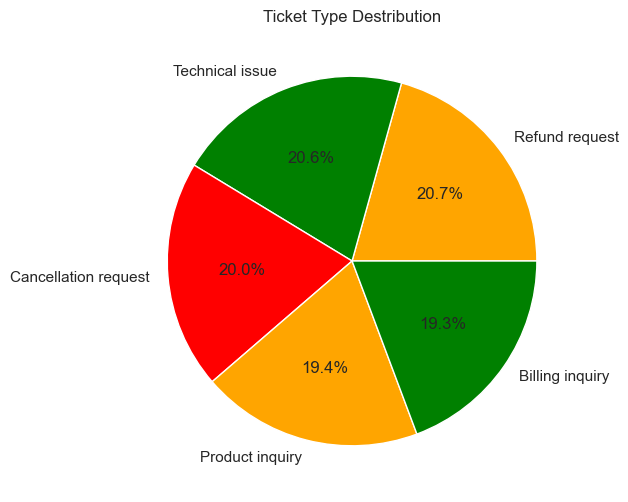

In [179]:
plt.figure(figsize=(8,6))
plt.pie(x=ticket_type.values, labels=ticket_type.index, autopct="%.1f%%", colors=["orange","green","red"])
plt.title("Ticket Type Destribution")
plt.show()

In [180]:
ticket_property = dataset["Ticket Priority"].value_counts()
ticket_property

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64

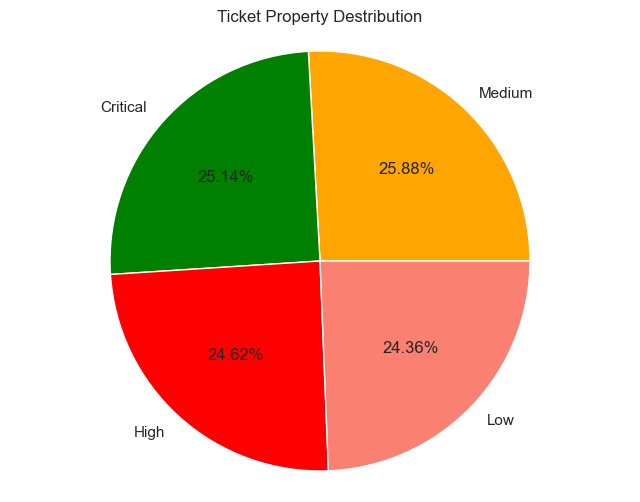

In [185]:
plt.figure(figsize=(8,6))
plt.pie(x=ticket_property.values, labels=ticket_property.index, autopct="%.2f%%", 
        colors=["orange","green","red","salmon"])
plt.title("Ticket Property Destribution")
plt.axis('equal')
plt.show()

In [190]:
# Define Age Group
bins = [0,20,30,40,50,60,70,80,90,100]
label = ['0-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']

In [191]:
dataset["Age Group"] = pd.cut(dataset["Customer Age"], bins=bins, labels=label, right=False)

In [192]:
track_by_age_group =  dataset.groupby("Age Group").size()

In [197]:
type(track_by_age_group)

pandas.core.series.Series

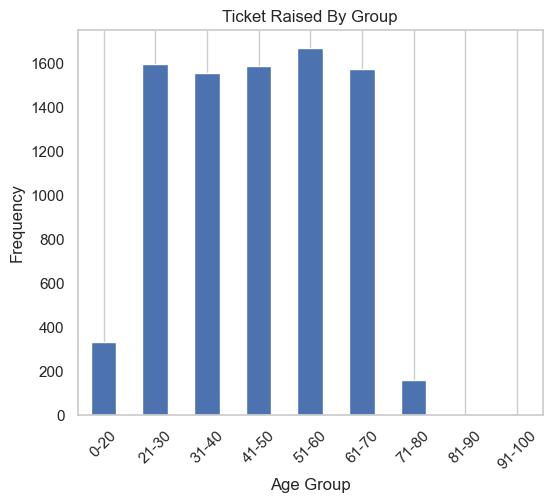

In [202]:
plt.figure(figsize=(6,5))
track_by_age_group.plot(kind='bar')
plt.title('Ticket Raised By Group')
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [203]:
# Replace inf values with NaN
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)


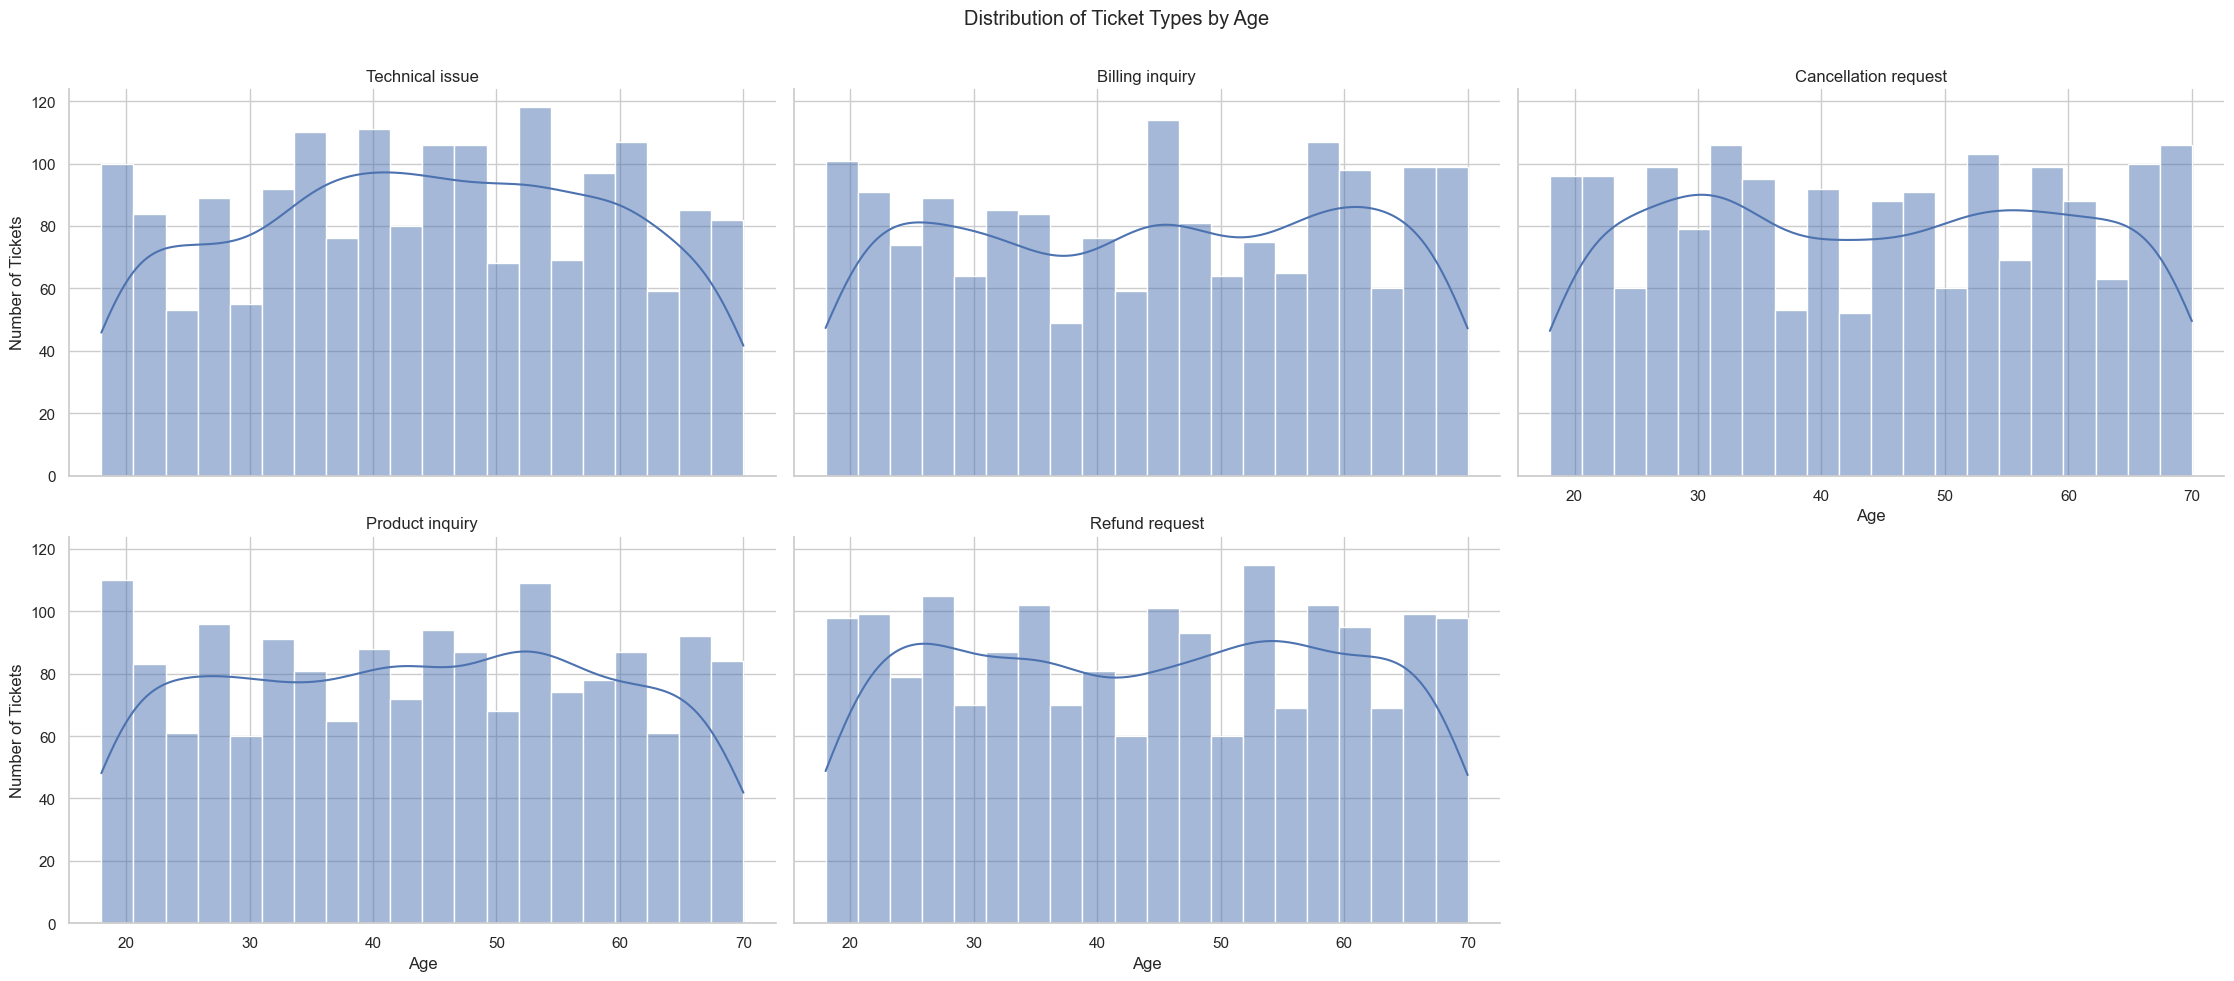

In [205]:
g = sns.FacetGrid(dataset,col='Ticket Type', col_wrap=3, height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20,kde=True)

# Set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')

# Show plot
plt.show()
